<br>
# ** 6 Predict the TimeSeries Data**
시계열 데이터 예측

<br><br>
## **1 은닉 마르코프 모델을 활용 (HMM)**
<img src="https://i.stack.imgur.com/rx8kj.png" width='400' align='left'>

<br>
### **01 Pattern 이 분명한 데이터를 활용하여 은닉 마르코프 모델 생성 (HMM)**
은닉 마르코프 모델의 용도를 확인해본다

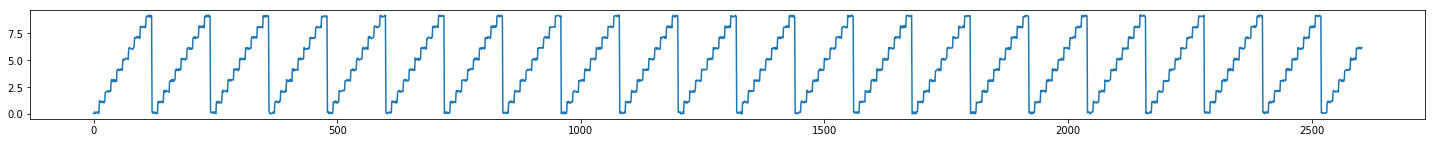

In [1]:
import numpy as np
from hmmlearn.hmm import GaussianHMM

data = np.loadtxt('./data/hmm_data.txt', delimiter=',')
X    = np.column_stack([data[:, 2]])
x    = [x[0] for x in X]

%matplotlib inline
import pandas as pd
pd.Series(x).plot(figsize=(25,2))

In [2]:
import warnings
warnings.filterwarnings("ignore")
num_components = 5
hmm = GaussianHMM(n_components    = num_components,
                  covariance_type = 'diag',
                  n_iter          = 1000)
hmm.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [3]:
hmm

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=5, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [4]:
hmm.means_

array([[8.59614675],
       [2.59988212],
       [6.58632566],
       [4.59770246],
       [0.60260697]])

In [5]:
for i in range(hmm.n_components):
    print('''Hidden state {:2} -  Mean : {:.3f} \\ Variance : {:.3f}'''.format(
        i + 1, hmm.means_[i][0], np.diag(hmm.covars_[i])[0]))    

Hidden state  1 -  Mean : 8.596 \ Variance : 0.260
Hidden state  2 -  Mean : 2.600 \ Variance : 0.259
Hidden state  3 -  Mean : 6.586 \ Variance : 0.253
Hidden state  4 -  Mean : 4.598 \ Variance : 0.252
Hidden state  5 -  Mean : 0.603 \ Variance : 0.253


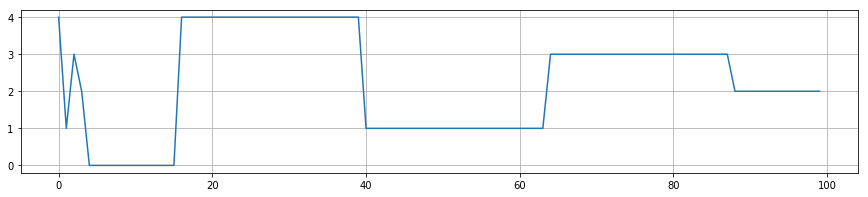

In [6]:
hidden_states = hmm.predict(X[-100:])
pd.Series(hidden_states).plot(figsize=(15,3), grid=True)

<br>
### **02 주가 데이터를 활용한 은닉 마르코프 모델 생성 (HMM)**
by Stock Price Data

In [7]:
# from pandas_datareader import get_data_yahoo
# price = get_data_yahoo('005930.KS','2017-06-01')
# price = price.fillna('ffill')
# price = price.dropna()
# price.tail(3)

In [8]:
# 저장된 CSV 파일을 사용한다

import pandas as pd
price = pd.read_csv('./data/stock.csv')
price = price.set_index('Date')
price.head(3)
price.index = pd.DatetimeIndex(price.index)
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2017-06-01 to 2018-06-11
Data columns (total 6 columns):
High         248 non-null float64
Low          248 non-null float64
Open         248 non-null float64
Close        248 non-null float64
Volume       248 non-null float64
Adj Close    248 non-null float64
dtypes: float64(6)
memory usage: 13.6 KB


In [9]:
import numpy as np
price_array = np.asarray(price.Close)
price_array.shape

(248,)

In [10]:
price_array = price_array.reshape(1, -1)
price_array.shape

(1, 248)

In [11]:
price_array.max()

57220.0

In [12]:
import warnings
warnings.filterwarnings("ignore")

num_components = 100
hmm            = GaussianHMM(n_components    = num_components,
                             covariance_type = 'diag',   
                             n_iter          = 1000)
hmm.fit(price_array.T)                                                

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=100, n_iter=1000, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

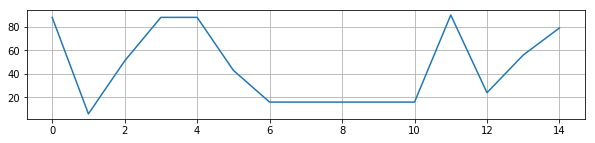

In [13]:
hidden_states = hmm.predict(price_array.T[:15])
pd.Series(hidden_states).plot(figsize=(10,2), grid=True)